# Lab 2: Aesthetics and Complex Graphs

Datasets:
- World temperature Dataset (https://data.world/data-society/global-climate-change-data/)
- Airbnb in Amsterdam (http://insideairbnb.com/amsterdam/)
- Students mobility (https://stats.oecd.org/Index.aspx?DataSetCode=EAG_ENRL_MOBILES_ORIGIN)

### Todays Lab:
- Aesthetics of graphs
    - Styles
    - Color palettes
    - Background
    - The grid
    - The legend
    - Transparency
    - Text elements
- Complex graphs
    - Combining graphs
    - Creating grid of graphs
- Statistics for more interesting graphs
    - Growth rate
    - Base year
    - Relative values

In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [2]:
# importing the mobility data
mobility_data = pd.read_csv('data/mobility_clean.csv', sep=',', index_col = 0, dtype = {'TIME': 'str'}) # note giving the type string to a year is not a good practice
mobility_data = mobility_data.dropna() # note deleting NA is important here
mobility_data.Value = mobility_data.Value.astype('int64') # note giving integer type is important
eu_netherlands_mobility = mobility_data[(mobility_data['Dest_Country']=='Netherlands') & (mobility_data['Orig_Region']=='Europe')]
# for clarity purposes we take the top 7 countries (excluding Germany, which is the 1st)
top_countries = eu_netherlands_mobility.sort_values(['Value'], ascending = False).Orig_Country.unique()[1:7]
top_nl_mobility = eu_netherlands_mobility[eu_netherlands_mobility.Orig_Country.isin(top_countries)]
top_nl_mobility = top_nl_mobility[['Orig_Country','TIME', 'Value']] # we just keep the colums we will be plotting!

matrix_data = top_nl_mobility.pivot(index='TIME', columns='Orig_Country')
matrix_data.columns = matrix_data.columns.droplevel(0)

print(matrix_data.head())

Orig_Country  Belgium  Bulgaria  Greece  Italy  Spain  United Kingdom
TIME                                                                 
2012             2288      1563    1475   1234    802             888
2013             2373      1614    1959   1487    965            1302
2014             2460      1628    2119   1726   1155            1616
2015             2677      1846    2292   2401   1531            2060


# Aesthetic elements


<Figure size 432x288 with 0 Axes>

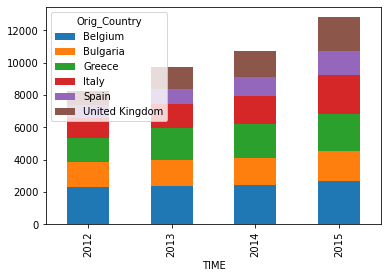

In [3]:
plt.figure()
matrix_data.plot(kind="bar", stacked=True)

## Style sheets

In [4]:
import matplotlib.style

mpl.style.use('seaborn') #classic, ggplot, dark_background, bmh... more in: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html


<Figure size 576x396 with 0 Axes>

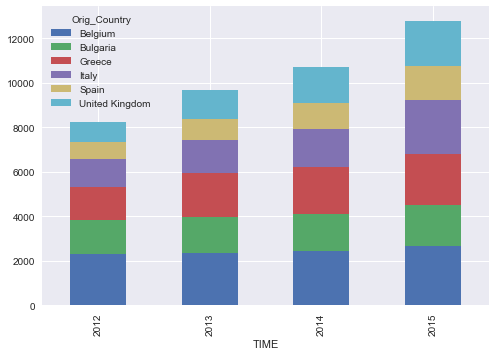

In [5]:
plt.figure()
matrix_data.plot(kind="bar", stacked=True)

## Color palettes

<Figure size 576x396 with 0 Axes>

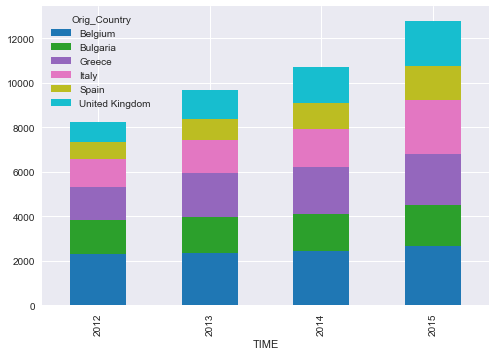

In [6]:
plt.figure()
matrix_data.plot(kind="bar", stacked=True, cmap="tab10") # viridis, Oranges. See more in: https://matplotlib.org/tutorials/colors/colormaps.html
# when choosing palette important: type of the data, intention of the plot

## Background

<Figure size 576x396 with 0 Axes>

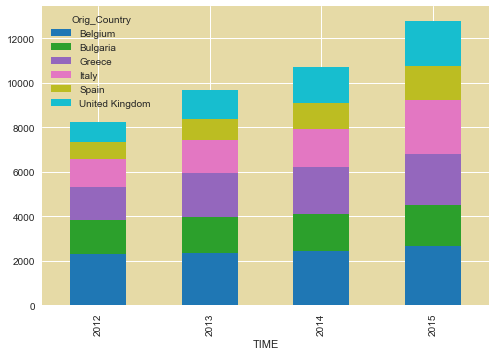

In [7]:
plt.figure()
matrix_data.plot(kind="bar", stacked=True, cmap="tab10")

ax = plt.gca() # retrieve the current axis
ax.set_facecolor('xkcd:beige') # more colors in: https://xkcd.com/color/rgb/


## Grid

<Figure size 576x396 with 0 Axes>

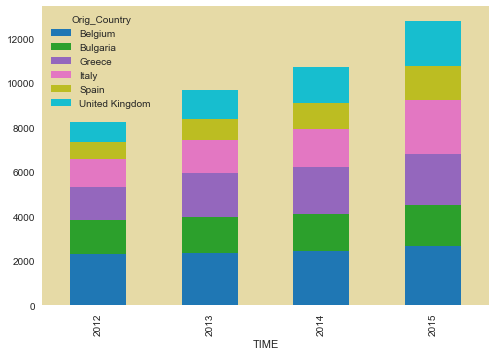

In [8]:
plt.figure()
matrix_data.plot(kind="bar", stacked=True, cmap="tab10")
ax = plt.gca() # retrieve the current axis
ax.set_facecolor('xkcd:beige') # more colors in: https://xkcd.com/color/rgb/

#ax.grid(color='r', linestyle='-', linewidth=2)
ax.grid(False)

## Legend

<Figure size 576x396 with 0 Axes>

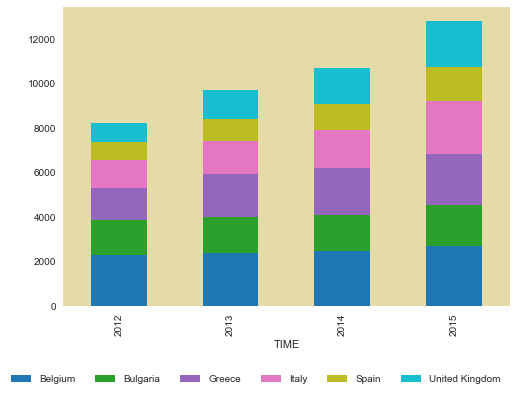

In [9]:
plt.figure()
matrix_data.plot(kind="bar", stacked=True, cmap="tab10")
ax = plt.gca() # retrieve the current axis
ax.set_facecolor('xkcd:beige') # more colors in: https://xkcd.com/color/rgb/
ax.grid(False)

#ax.legend(loc='upper right')
#ax.legend(loc='center left')
#ax.legend(bbox_to_anchor=(1, 0.4)) #bbox_to_anchor=(place_in_frame_x, place_in_frame_y)
ax.legend(bbox_to_anchor=(1, -0.20), ncol=6)

## Transparency

<Figure size 576x396 with 0 Axes>

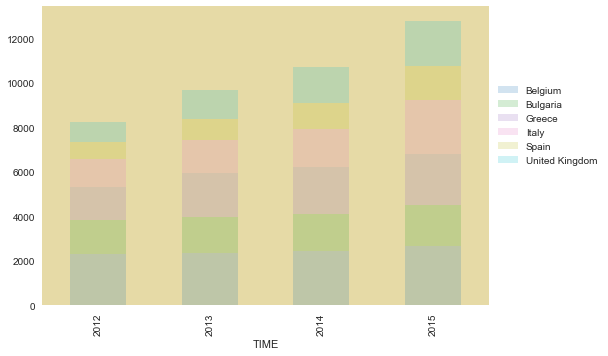

In [10]:
plt.figure()
matrix_data.plot(kind="bar", stacked=True, cmap="tab10", alpha=0.2) # alpha goes from 0 to 1 and changes the transparency, useful in overlaping graphs
ax = plt.gca() # retrieve the current axis
ax.set_facecolor('xkcd:beige') # more colors in: https://xkcd.com/color/rgb/
ax.grid(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.6))

## Text elements

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

<Figure size 576x396 with 0 Axes>

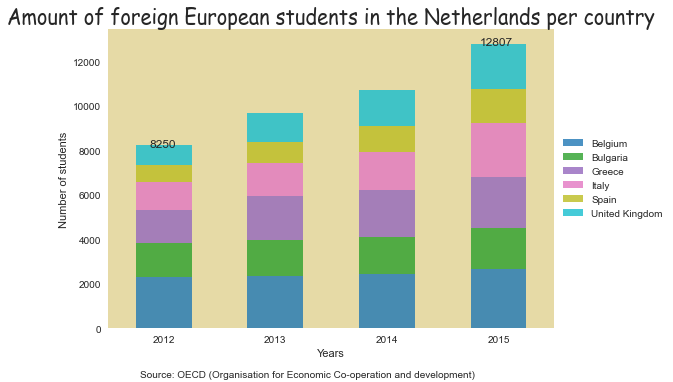

In [11]:
plt.figure()
matrix_data.plot(kind="bar", stacked=True, cmap="tab10", alpha=0.8) # alpha goes from 0 to 1 and changes the transparency, useful in overlaping graphs
ax = plt.gca() # retrieve the current axis
ax.set_facecolor('xkcd:beige') # more colors in: https://xkcd.com/color/rgb/
ax.grid(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# add the source
plt.annotate('Source: OECD (Organisation for Economic Co-operation and development)', (0,0), (140,5), fontsize=10, xycoords='figure fraction', textcoords='offset points')
#(axis_x, axis_y), (movement_in_x_axis, movement_in_y_axis)
# annotate some of the values
total = matrix_data.sum(axis=1) # sums all the raws of the matrix
plt.annotate(total[0], (0,0), (150,235), fontsize = 12, xycoords='figure fraction', textcoords='offset points')
plt.annotate(total[3], (0,0), (480,337), fontsize = 12, xycoords='figure fraction', textcoords='offset points')
# add title
plt.title("Amount of foreign European students in the Netherlands per country", {'fontsize': 20, 'family': 'fantasy'})
# add labels to axis
plt.xlabel('Years')
plt.ylabel('Number of students')
plt.xticks(rotation=0)

# more about text properties here: https://matplotlib.org/3.1.1/tutorials/text/text_props.html

### Saving the plot

<Figure size 576x396 with 0 Axes>

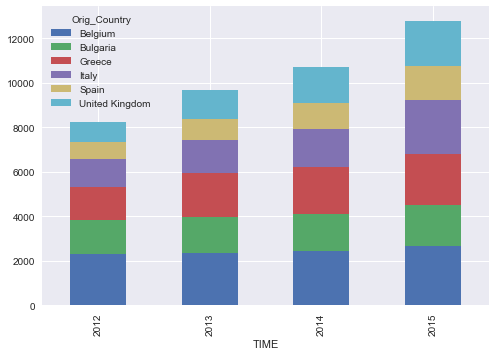

In [12]:
plt.figure()
matrix_data.plot(kind="bar", stacked=True)

# to save our plot into a png
plt.savefig('final_plot.png')

# QUESTIONS UNTIL HERE?

# Complex Graphs

## Combining plots

In [13]:
# we are going to add to the plot the total growth rate per year!!
# we explain the growth-rate later in this lab
total = matrix_data.sum(axis=1)
previous = total[0]
growth_list = []
for a in total:
    growth = (a-previous)/previous
    previous = a
    growth_list.append(growth)
print(growth_list)

[0.0, 0.17575757575757575, 0.10350515463917526, 0.19646860986547085]


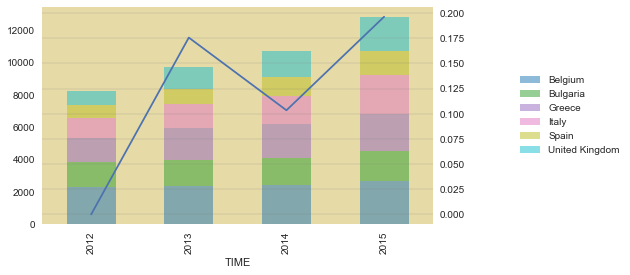

In [14]:
# now we plot!!
fig, ax1 = plt.subplots(figsize=(7,4)) # we create a figure that is going to contain subplots

ax2 = ax1.twinx() # we create a second twin axis that will share the x axis of the first!

# we create the barplot as before
matrix_data.plot(kind = 'bar', stacked=True, cmap="tab10", alpha=0.5, # we add transparency to the bar plot
                 ax = ax1) # we assign axis 1 to the first plot

# and now we plot the growth rate assigning ax2 as axis
sns.lineplot(matrix_data.index, growth_list, ax = ax2) # note that we have used seaborn instead of matplotlib

# finally, we add some elements to make it nicer
ax1.legend(loc='center left', bbox_to_anchor=(1.2, 0.5)) # note that we just add a legend for ax1
ax1.set_facecolor('xkcd:beige') # more colors in: https://xkcd.com/color/rgb/
ax1.grid(False)
ax2.grid(color='grey', linestyle='-', linewidth=0.2) # we create a grid for ax2
    

## Combining plots with GridSpec

Text(0.5, 0.5, 'ax4: gs[1:3, 2]')

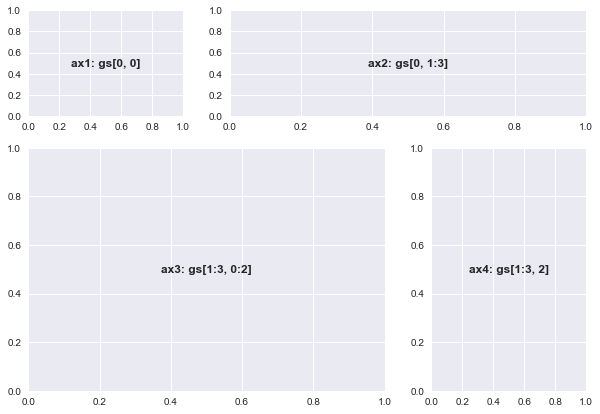

In [15]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(nrows=3, 
                       ncols=3, 
                       figure=fig, 
                       width_ratios= [1, 1, 1], # width of each of the columns
                       height_ratios=[1, 1, 1], # height of each of the columns
                       wspace=0.3, # vertical margin between columns 
                       hspace=0.3) # horizontal margin between columns

# we create 4 different axis located in the grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:3]) # note that the plot starts in position 1 (at the end of column 0) and ends in position 3 (at the end of column 3)
ax3 = fig.add_subplot(gs[1:3, 0:2])
ax4 = fig.add_subplot(gs[1:3, 2])

# the following lines annotate which axis is which (note that text() is a similar formula to annotate())
ax1.text(0.5, 0.5, 'ax1: gs[0, 0]', fontsize=12, fontweight="bold", va="center", ha="center")  # adding text to ax1
ax2.text(0.5, 0.5, 'ax2: gs[0, 1:3]', fontsize=12, fontweight="bold", va="center", ha="center")
ax3.text(0.5, 0.5, 'ax3: gs[1:3, 0:2]', fontsize=12, fontweight="bold", va="center", ha="center")
ax4.text(0.5, 0.5, 'ax4: gs[1:3, 2]', fontsize=12, fontweight="bold", va="center", ha="center")
#source: https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0

### Let's fill it with plots!!

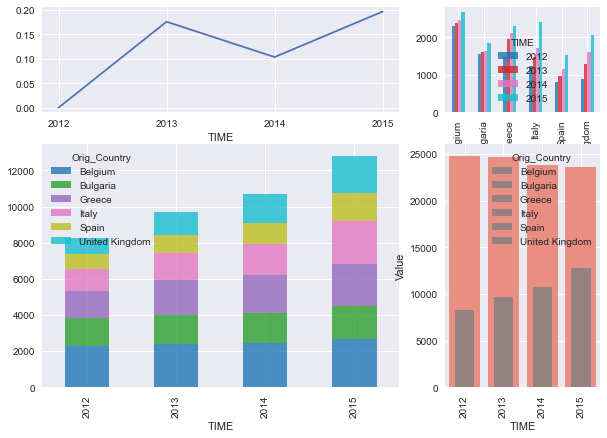

In [16]:
# now we can add our previous graphs to the grid
fig = plt.figure(figsize=(10,7))
#fig, axes = plt.subplots(figsize=(20,10)) # we create a figure that is going to contain subplots
gs = gridspec.GridSpec(nrows=3, 
                       ncols=3, 
                       figure=fig, 
                       width_ratios= [1, 1, 1], # width of each of the columns
                       height_ratios=[1, 1, 1], # height of each of the columns
                       wspace=0.3, # vertical margin between columns 
                       hspace=0.3) # horizontal margin between columns

# we create 4 different axis located in the grid
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:3]) # note that the plot starts in position 1 (at the end of column 0) and ends in position 3 (at the end of column 3)
ax3 = fig.add_subplot(gs[1:3, 0:2])
ax4 = fig.add_subplot(gs[1:3, 2])

# we create the line plot
sns.lineplot(matrix_data.index, growth_list, ax = ax1) # note that we have used seaborn instead of matplotlib

# we create the barplot as before
transposed_matrix = matrix_data.transpose()
transposed_matrix.plot(kind = 'bar', cmap="tab10", alpha=0.8, ax = ax2) 

# we create the barplot as before
matrix_data.plot(kind = 'bar', stacked=True, cmap="tab10", alpha=0.8, ax = ax3) 

# we can add Germany now in a different plot
germany_nl_mobility = eu_netherlands_mobility[eu_netherlands_mobility.Orig_Country == 'Germany']
sns.barplot(germany_nl_mobility.TIME, germany_nl_mobility.Value, color = '#FA8072', ax = ax4) #note that you can look for color codes on Google
matrix_data.plot(kind = 'bar', stacked=True, color = "grey", alpha=0.8, ax = ax4) 


### Let's make it nice! 
Adding all the elements in the GridSpec is advanced for now, so I'll just give the code and you can take a look.

Text(0.5, 0.98, 'European students in the Netherlands')

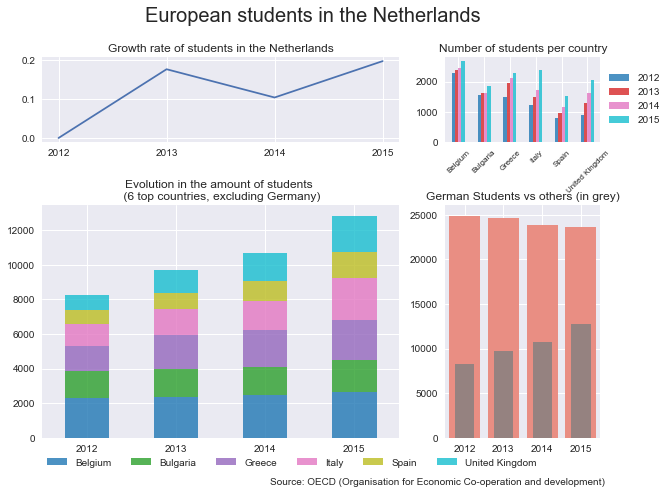

In [17]:
# now we can add our previous graphs to the grid
fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(nrows=3, 
                       ncols=3, 
                       figure=fig, 
                       width_ratios= [1, 1, 1], # width of each of the columns
                       height_ratios=[1, 1, 1], # height of each of the columns
                       wspace=0.3, # vertical margin between columns 
                       hspace=0.75) # horizontal margin between columns

# we create 4 different axis located in the grid
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:3]) # note that the plot starts in position 1 (at the end of column 0) and ends in position 3 (at the end of column 3)
ax3 = fig.add_subplot(gs[1:3, 0:2])
ax4 = fig.add_subplot(gs[1:3, 2])

# we create the line plot
sns.lineplot(matrix_data.index, growth_list, ax = ax1) # note that we have used seaborn instead of matplotlib
ax1.title.set_text('Growth rate of students in the Netherlands')
ax1.set_xlabel(None)

# we create the barplot by country, tranposing the data
transposed_matrix = matrix_data.transpose()
transposed_matrix.plot(kind = 'bar', cmap="tab10", alpha=0.8, ax = ax2) 
ax2.title.set_text('Number of students per country')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, size = 8)
ax2.set_xlabel(None)


# we create the barplot as before
matrix_data.plot(kind = 'bar', stacked=True, cmap="tab10", alpha=0.8, ax = ax3)
ax3.title.set_text('Evolution in the amount of students \n (6 top countries, excluding Germany)')
ax3.legend(loc='upper center', bbox_to_anchor=(0.7, -0.05), ncol=6)
ax3.set_xlabel(None)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=0)

# we can add Germany now in a different plot
germany_nl_mobility = eu_netherlands_mobility[eu_netherlands_mobility.Orig_Country == 'Germany']
sns.barplot(germany_nl_mobility.TIME, germany_nl_mobility.Value, color = '#FA8072', ax = ax4) #note that you can look for color codes on Google
matrix_data.plot(kind = 'bar', stacked=True, color = "grey", alpha=0.8, ax = ax4) 
ax4.title.set_text('German Students vs others (in grey)')
plt.xticks(rotation = 0)
ax4.get_legend().remove()
ax4.set_xlabel(None)
ax4.set_ylabel(None)

ax4.annotate('Source: OECD (Organisation for Economic Co-operation and development)', (0,0), (-175,-40), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

fig.suptitle('European students in the Netherlands', size=20)

# you can observe that some of the values have been added with functions starting by set_, these can be found here: https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_position


## Statistical measures for more interesting visualisations

### Growth-rate

$GrowthRate = \dfrac{CurrentValue-PreviousValue}{PreviousValue}$

In [18]:
total = matrix_data.sum(axis=1)
total

TIME
2012     8250
2013     9700
2014    10704
2015    12807
dtype: int64

[0.0, 0.17575757575757575, 0.10350515463917526, 0.19646860986547085]


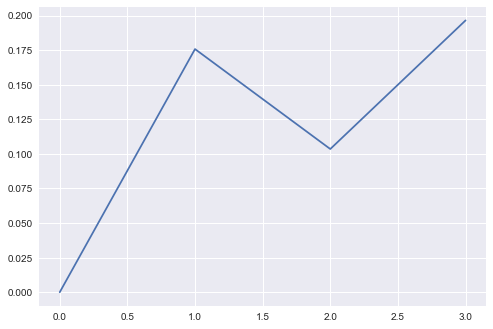

In [19]:
previous = total[0]
growth_list = []
for a in total:
    growth = (a-previous)/previous
    previous = a
    growth_list.append(growth)
print(growth_list)

plt.plot(growth_list)

### Base Year Index

Total employment in country X is 5 million persons in 2010, 6 million persons in 2011 and 9 million persons in 2012. To see the change from 2010 and onwards, 2010 is set as a base year, which means that the value of the index in 2010 is 100.

The increase is calculated as follows:

(6 million/5 million) x 100= 120 = the value of the index in 2011

(9 million/5 million) x 100= 180 = the value of the index in 2012 

$GrowthBasedInYear = \dfrac{CurrentYear}{BaseYear}\times 100$

In [20]:
# Change of number of students in the EU with base year 2012

top_countries = eu_netherlands_mobility.sort_values(['Value'], ascending = False).Orig_Country.unique()[0:7]
top_nl_mobility = eu_netherlands_mobility[eu_netherlands_mobility.Orig_Country.isin(top_countries)]

top_nl_mobility['index_change'] = (top_nl_mobility.groupby(['Orig_Country'])['Value'].apply(lambda x: x/x.iloc[0] * 100))

top_nl_mobility.head()

<ipython-input-20-aa2f21df6298>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_nl_mobility['index_change'] = (top_nl_mobility.groupby(['Orig_Country'])['Value'].apply(lambda x: x/x.iloc[0] * 100))


,Orig_Country,Dest_Country,LOCATION,TIME,Orig_Region,Value,Other_info,index_change
47429,Belgium,Netherlands,NLD,2012,Europe,2288,"Students from Belgium, both sexes (number)",100.000000
47430,Belgium,Netherlands,NLD,2013,Europe,2373,"Students from Belgium, both sexes (number)",103.715035
47431,Belgium,Netherlands,NLD,2014,Europe,2460,"Students from Belgium, both sexes (number)",107.517483
47432,Belgium,Netherlands,NLD,2015,Europe,2677,"Students from Belgium, both sexes (number)",117.001748
52065,Bulgaria,Netherlands,NLD,2012,Europe,1563,"Students from Bulgaria, both sexes (number)",100.000000


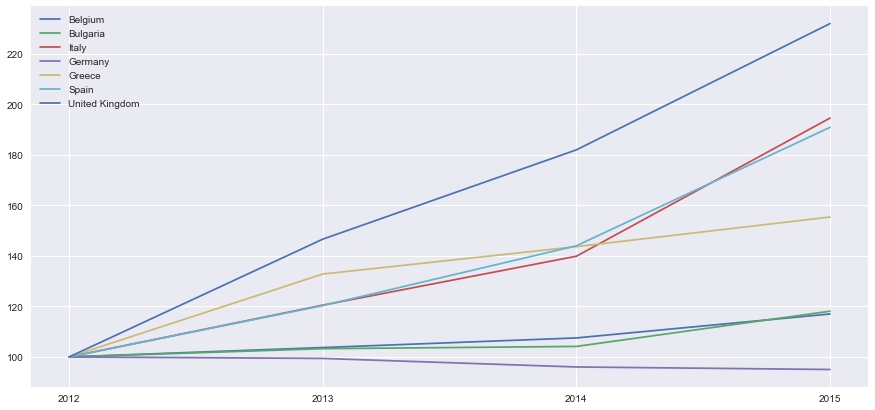

In [21]:
plt.figure(figsize=(15,7))

for i,country in enumerate(top_nl_mobility.Orig_Country.unique()):
    data = top_nl_mobility[top_nl_mobility.Orig_Country == country]
    plt.plot(data.TIME, data.index_change)

plt.legend(top_nl_mobility.Orig_Country.unique())

### Make values relative

$RelativeValue = \dfrac{VariableValue}{SumOfAllVariables}$

In [22]:
top_nl_mobility = top_nl_mobility[top_nl_mobility.Orig_Country!='Germany']

top_nl_mobility['relative_value'] = top_nl_mobility['Value'].div(top_nl_mobility.groupby('TIME')['Value'].transform('sum'))

top_nl_mobility.head()

,Orig_Country,Dest_Country,LOCATION,TIME,Orig_Region,Value,Other_info,index_change,relative_value
47429,Belgium,Netherlands,NLD,2012,Europe,2288,"Students from Belgium, both sexes (number)",100.000000,0.277333
47430,Belgium,Netherlands,NLD,2013,Europe,2373,"Students from Belgium, both sexes (number)",103.715035,0.244639
47431,Belgium,Netherlands,NLD,2014,Europe,2460,"Students from Belgium, both sexes (number)",107.517483,0.229821
47432,Belgium,Netherlands,NLD,2015,Europe,2677,"Students from Belgium, both sexes (number)",117.001748,0.209026
52065,Bulgaria,Netherlands,NLD,2012,Europe,1563,"Students from Bulgaria, both sexes (number)",100.000000,0.189455


<Figure size 576x396 with 0 Axes>

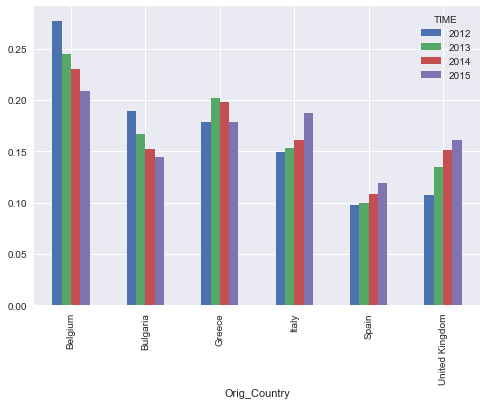

In [23]:
top_nl_mobility = top_nl_mobility[['Orig_Country','TIME', 'relative_value']] 
matrix_data = top_nl_mobility.pivot(index='Orig_Country', columns='TIME')
matrix_data.columns = matrix_data.columns.droplevel(0)

plt.figure()
matrix_data.plot(kind="bar", stacked=False)

## Other sources
- Which plots to use for which data and more information on gridsepc: https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0

## Hand-in lab 2

Choose one of the datasets that we presented last week and think of an interesting question. Use plots to answer it. Use at least two plots (in a grid or combined), of which at least one includes a statistic measure. Don't forget to add all the elements that a final plot needs (title, source, axis names, etc.). Justify in 2 sentences your choices of aesthetic elements. You can reuse the plot/question you did for last week.

You can do this exercise in pairs, but each person should hand it in individually. You can hand it in as a jupyter notebook and add a brief description (2-3 sentences). 